In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [4]:
# load CIFAR-10 Datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# Normalize the Pixel Values to 0, 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float') / 255.0

In [6]:
# One Hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
# View Data Shape 
print(f"Training Data Shape: \n{X_train.shape}")
print(f"\nTesting Data Shape: \n{X_test.shape}")

Training Data Shape: 
(50000, 32, 32, 3)

Testing Data Shape: 
(10000, 32, 32, 3)


In [14]:
# Define the Baseline Model
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

In [15]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Display the Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the Baseline Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.3600 - loss: 1.7465 - val_accuracy: 0.4925 - val_loss: 1.4169
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4771 - loss: 1.4496 - val_accuracy: 0.5563 - val_loss: 1.2728
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5251 - loss: 1.3314 - val_accuracy: 0.5924 - val_loss: 1.1793
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5550 - loss: 1.2466 - val_accuracy: 0.6071 - val_loss: 1.1225
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5754 - loss: 1.1966 - val_accuracy: 0.6331 - val_loss: 1.0612
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5989 - loss: 1.1330 - val_accuracy: 0.6426 - val_loss: 1.0158
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6156 - loss: 1.0883 - val_accuracy: 0.6575 - val_loss: 0.9962
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6280 - loss: 1.0527 - 

In [18]:
# Evaluate the BAseline Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Baseline Model Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6766 - loss: 0.9304
Baseline Model Test Accuracy: 0.6766


In [19]:
# Define the Improved Model
improved_model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

In [20]:
# Compile the Improved Model with a Learning Rate Scheduler
optimized= tf.keras.optimizers.Adam(learning_rate=0.00075)
improved_model.compile(optimizer=optimized, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
improved_history = improved_model.fit(
    X_train, y_train, validation_split=0.25, batch_size=48, epochs=20, verbose=1
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.3961 - loss: 1.6485 - val_accuracy: 0.5233 - val_loss: 1.3288
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.5354 - loss: 1.3043 - val_accuracy: 0.5936 - val_loss: 1.1590
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.5943 - loss: 1.1507 - val_accuracy: 0.6121 - val_loss: 1.0963
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6385 - loss: 1.0348 - val_accuracy: 0.6462 - val_loss: 1.0152
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.6629 - loss: 0.9615 - val_accuracy: 0.6586 - val_loss: 0.9763
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.6895 - loss: 0.8827 - val_accuracy: 0.6882 - val_loss: 0.8929
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.7111 - loss: 0.8177 - val_accuracy: 0.6980 - val_loss: 0.8776
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.7325 - loss: 0.7550 -

In [22]:
# Evaluarte Improved Model 
improved_loss, improved_accuracy = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"Improved Model Test Accuracy: {improved_accuracy:.4f}")

Improved Model Test Accuracy: 0.7133


### Visualize the Entire Training Progress

In [23]:
import matplotlib.pyplot as plt

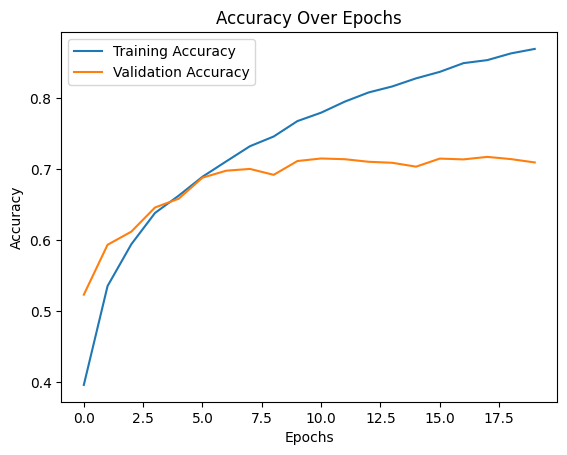

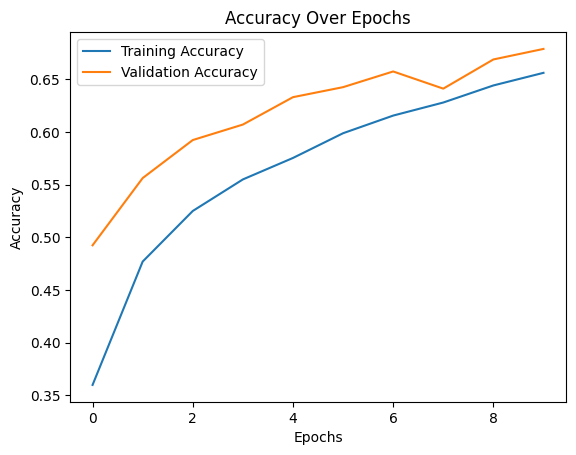

In [29]:
# Plot Training and Validation Accuracy for Improved Model
plt.plot(improved_history.history['accuracy'], label='Training Accuracy')
plt.plot(improved_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy for Baseline Model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

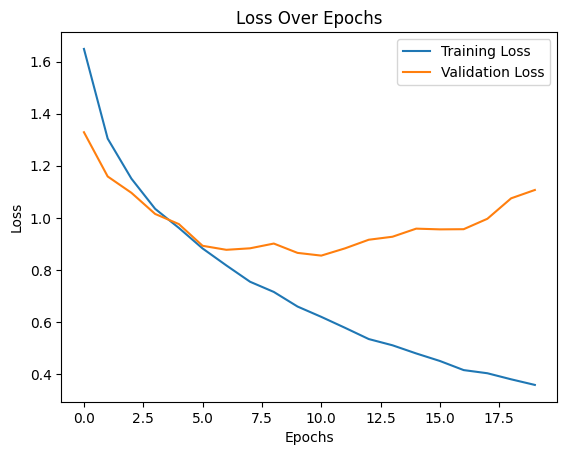

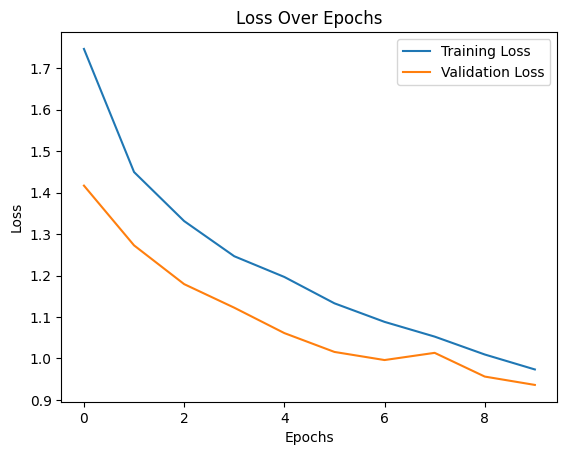

In [28]:
# Plot Training and Validation Loss for Improved Model
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Loss for Baseline Model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()